In [ ]:
!pip install tensorflow==2.4.3

     |████████████████████████████████| 394.5 MB 366 bytes/s 
     |████████████████████████████████| 2.9 MB 40.1 MB/s 
     |████████████████████████████████| 3.8 MB 52.8 MB/s 
     |████████████████████████████████| 462 kB 50.9 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68721 sha256=9af05856481f307dad150da1df71d2e939dc3c3a47af54e4dc99174d0dada19e
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
     

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Intermediate Machine Learning/amazon_reviews_us_Video_Games_v1_00.tsv', sep='\t',error_bad_lines=False)

b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\n'


In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809.0,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5.0,0.0,0.0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175.0,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5.0,0.0,0.0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668.0,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1.0,0.0,1.0,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350.0,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3.0,0.0,0.0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511.0,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4.0,0.0,0.0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31


In [ ]:
df['sentiments'] = df.star_rating.apply(lambda x: 0 if x in [1, 2, 3] else 1)

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiments
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809.0,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5.0,0.0,0.0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31,1
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175.0,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5.0,0.0,0.0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31,1
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668.0,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1.0,0.0,1.0,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31,0
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350.0,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3.0,0.0,0.0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,0
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511.0,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4.0,0.0,0.0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31,1


In [ ]:
df[df['sentiments']==1]['review_id'][1]

'R1ZV7R40OLHKD'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow import keras
import pickle

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")

In [ ]:
split = round(len(df)*0.8)
train_reviews = df['review_id'][:split]
train_label = df['sentiments'][:split]
test_reviews = df['review_id'][split:]
test_label = df['sentiments'][split:]

In [ ]:
train_reviews

0          RTIS3L2M1F5SM
1          R1ZV7R40OLHKD
2         R3BH071QLH8QMC
3         R127K9NTSXA2YH
4         R32ZWUXDJPW27Q
               ...      
186861     RCYOX974UDBAC
186862    R1AWPNGPD7324V
186863    R29PRHSP148NO4
186864     RPH9FM0I3TQOW
186865    R3HRIODQ5SIE2S
Name: review_id, Length: 186866, dtype: object

In [ ]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for column in train_reviews:
    training_sentences.append(str(column))
for column in train_label:
    training_labels.append(column)
for column in test_reviews:
    testing_sentences.append(str(column))
for column in test_label:
    testing_labels.append(column)

In [ ]:
training_sentences

['RTIS3L2M1F5SM',
 'R1ZV7R40OLHKD',
 'R3BH071QLH8QMC',
 'R127K9NTSXA2YH',
 'R32ZWUXDJPW27Q',
 'R3AQQ4YUKJWBA6',
 'R2F0POU5K6F73F',
 'R3VNR804HYSMR6',
 'R3GZTM72WA2QH',
 'RNQOY62705W1K',
 'R1VTIA3JTYBY02',
 'R29DOU8791QZL8',
 'R15DUT1VIJ9RJZ',
 'R3IMF2MQ3OU9ZM',
 'R23H79DHOZTYAU',
 'RIV24EQAIXA4O',
 'R3UCNGYDVN24YB',
 'RUL4H4XTTN2DY',
 'R20JF7Z4DHTNX5',
 'R2T1AJ5MFI2260',
 'RYSSKR5ZTU8JX',
 'R2E5BQMWTW9JUQ',
 'R1UC7WJRQQKU5V',
 'R3V0YK55IDIW3T',
 'R14Z48EC6DKJX9',
 'R3AACSKX1EAHUY',
 'R1FJWU0IJ4KUT4',
 'R3D8ELWH0671OJ',
 'R3IU97WRKS5SLN',
 'RJOF64DZUKQ3D',
 'R3GXKE92MJBBSL',
 'R3EKZ2GTIPQ3ZL',
 'R23HC6NMA3HBPS',
 'R3ANEHLBZQZKBI',
 'R1DLJMMMK89CGD',
 'RUGCK1O1I3YAD',
 'R32GULBEVCP7C6',
 'R3HOHBDG1HOZLE',
 'R8HD4KOH8L0A6',
 'R1OTFNID62KK2T',
 'R1VMI5EN72ALKT',
 'R1H4FFUAQGFD3Q',
 'R2MTHHQM6RSDQK',
 'R2FGNUPI80N01F',
 'R2636ZX835F2AQ',
 'R9WP6WZ1ANYSD',
 'R19IRZAAPBCJES',
 'R2TGYMO2PKK8LN',
 'RE9PNA5CSDZLG',
 'R3DCTXDTB028VH',
 'RL1N4DGJUCG74',
 'R35DQBORMMU81P',
 'R3VTIZI7XPW9PR',
 'R3E3

In [ ]:
training_sentences[0]

'RTIS3L2M1F5SM'

In [ ]:
training_labels[0]

1

In [ ]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
tokenizer

In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)

In [ ]:
sequences

[[2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134],
 [135],
 [136],
 [137],
 [138],
 [139],
 [

In [ ]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

In [ ]:
padded

array([[0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [ ]:
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [ ]:
type(training_labels)

list

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
training_labels_final

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
testing_labels_final

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
5840/5840 [==============================] - 44s 7ms/step - loss: 0.5247 - accuracy: 0.7903 - val_loss: 0.4974 - val_accuracy: 0.8024
Epoch 2/20
5840/5840 [==============================] - 43s 7ms/step - loss: 0.5124 - accuracy: 0.7913 - val_loss: 0.4975 - val_accuracy: 0.8024
Epoch 3/20
5840/5840 [==============================] - 43s 7ms/step - loss: 0.5145 - accuracy: 0.7896 - val_loss: 0.4972 - val_accuracy: 0.8024
Epoch 4/20
5840/5840 [==============================] - 43s 7ms/step - loss: 0.5123 - accuracy: 0.7912 - val_loss: 0.4976 - val_accuracy: 0.8024
Epoch 5/20
5840/5840 [==============================] - 45s 8ms/step - loss: 0.5137 - accuracy: 0.7901 - val_loss: 0.4970 - val_accuracy: 0.8024
Epoch 6/20
5840/5840 [==============================] - 45s 8ms/step - loss: 0.5132 - accuracy: 0.7903 - val_loss: 0.4993 - val_accuracy: 0.8024
Epoch 7/20
5840/5840 [==============================] - 45s 8ms/step - loss: 0.5123 - accuracy: 0.7908 - val_loss: 0.4971 - val_ac

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.5199095517396927)

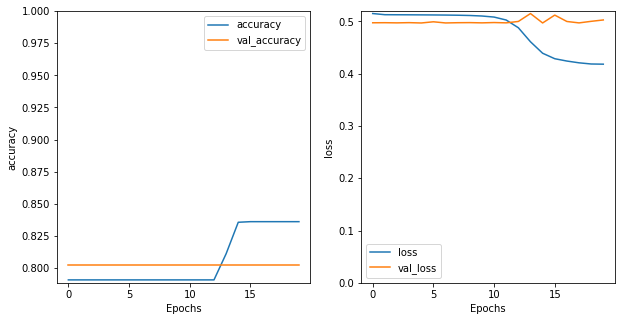

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
sample_text = [df[df['sentiments']==1]['review_id'][1]]
sample_text

['R1ZV7R40OLHKD']

In [ ]:
sample_sequences = tokenizer.texts_to_sequences(sample_text)

In [ ]:
sample_padded = pad_sequences(sample_sequences, maxlen=max_length, truncating=trunc_type)

In [ ]:
predictions = model.predict(sample_padded)
predictions

array([[0.9907812]], dtype=float32)

In [ ]:
if predictions[0][0] > 0.5:
  print('Review Positive')
else:
  print('Review Negative')

Review Positive


In [ ]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save('./test_model', save_format='tf')

INFO:tensorflow:Assets written to: ./test_model/assets


In [ ]:
!zip -r 'test_model.zip' 'test_model'

  adding: test_model/ (stored 0%)
  adding: test_model/variables/ (stored 0%)
  adding: test_model/variables/variables.index (deflated 61%)
  adding: test_model/variables/variables.data-00000-of-00001 (deflated 35%)
  adding: test_model/saved_model.pb (deflated 87%)
  adding: test_model/assets/ (stored 0%)
